<a href="https://colab.research.google.com/github/idziksmart/data-science/blob/master/Drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.2.2'

In [2]:

data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


Regresja liniowa

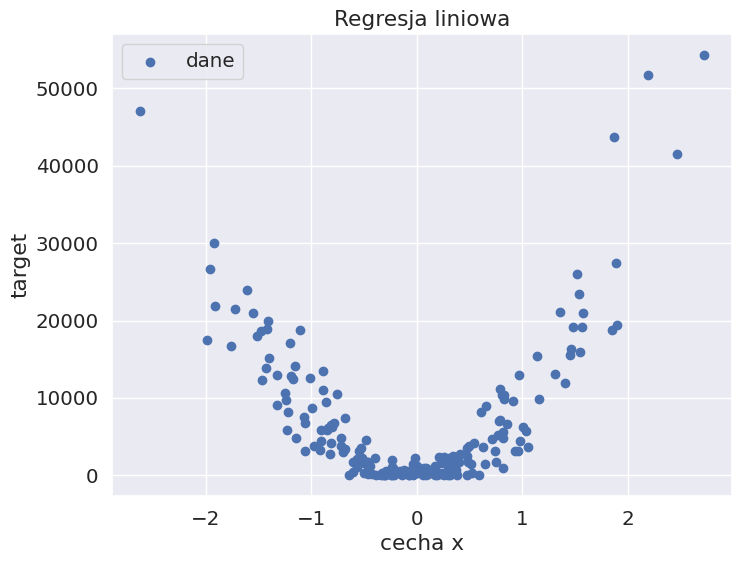

In [3]:

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

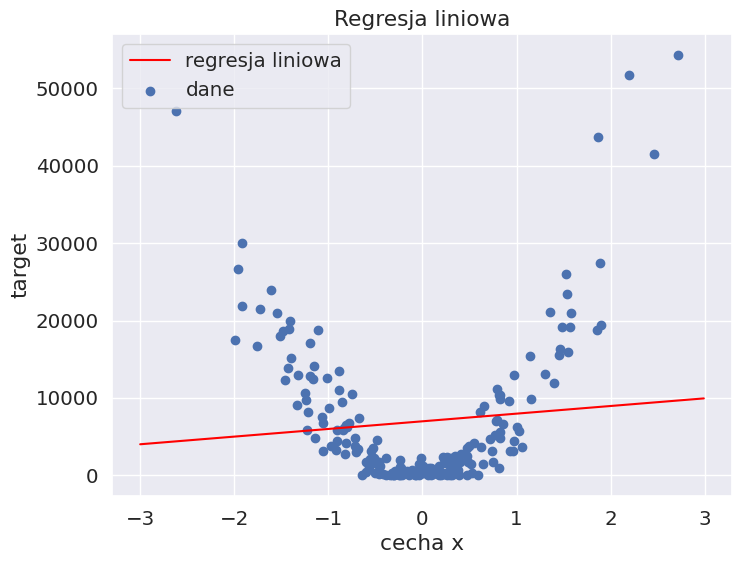

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

Regresja drzew decyzyjnych

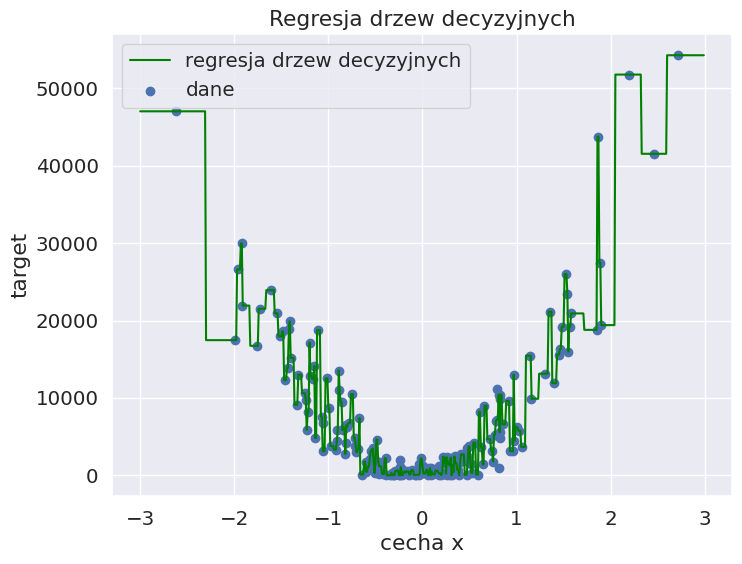

In [5]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

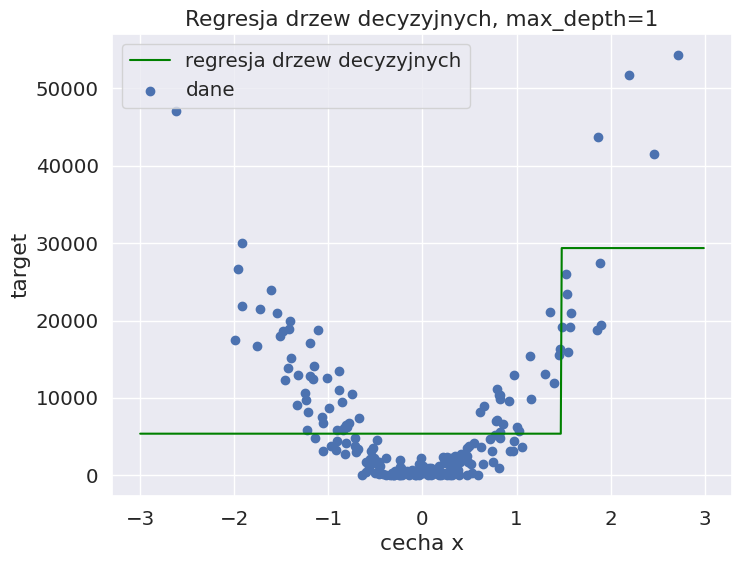

In [6]:
max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title(f'Regresja drzew decyzyjnych, max_depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

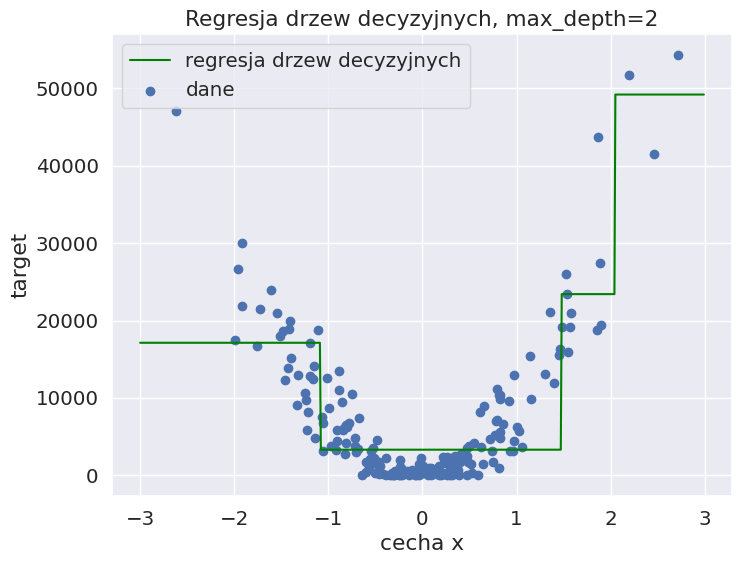

In [10]:
max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title(f'Regresja drzew decyzyjnych, max_depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

Graf drzewa decyzyjnego

In [27]:
!pip install sklearn.externals
from sklearn.tree import export_graphviz
from ipywidgets import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(value=graph.create_png(), width=600)

ERROR: Could not find a version that satisfies the requirement sklearn.externals (from versions: none)
ERROR: No matching distribution found for sklearn.externals


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x88\x00\x00\x01g\x08\x06\x00\x00\x00\xcd\x06r3\x…

Model drzewa decyzyjnego - budowa funkcji

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x88\x00\x00\x01g\x08\x06\x00\x00\x00\xcd\x06r3\x…

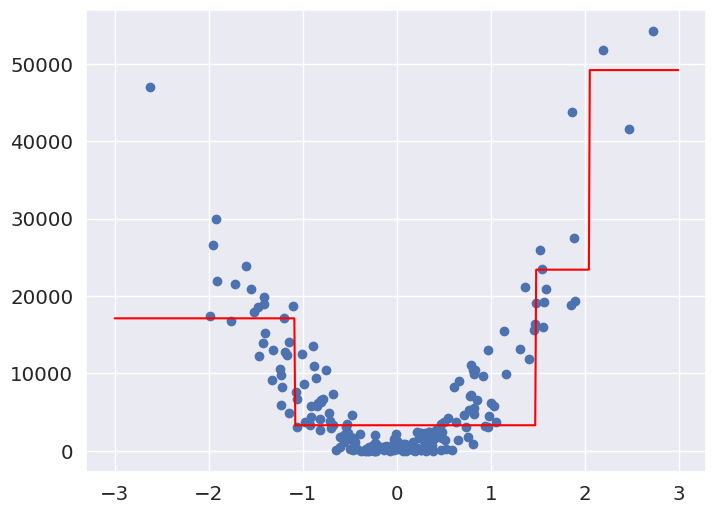

In [22]:
from io import StringIO
import pydotplus
from ipywidgets import Image

def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(value = graph.create_png(), width=300 + max_depth * 100)

make_dt_regression(max_depth=2)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0c\xaf\x00\x00\x02|\x08\x02\x00\x00\x00\r\xdf\xf4M\…

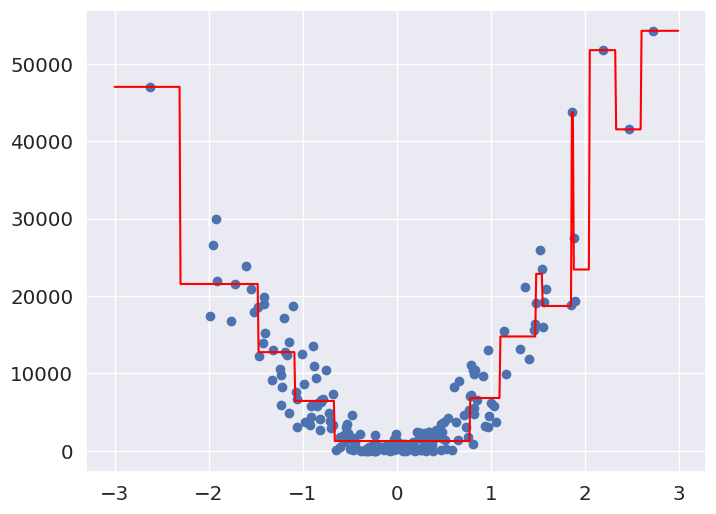

In [23]:
make_dt_regression(max_depth=4)